In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

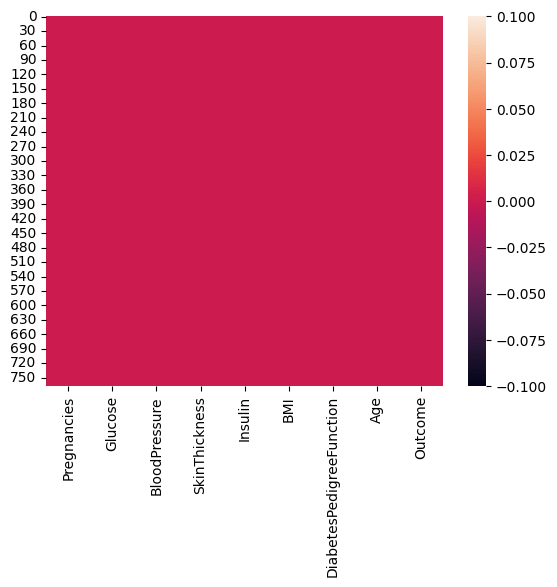

In [5]:
sns.heatmap(data.isnull())

In [6]:
correlation =data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

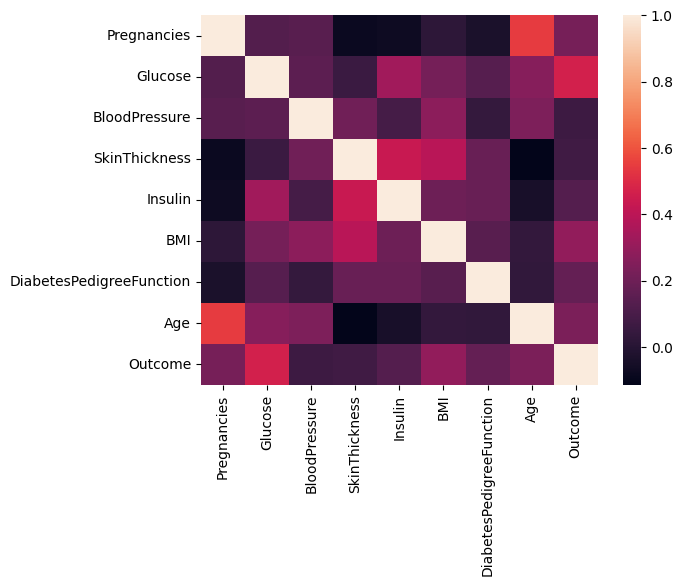

In [7]:
sns.heatmap(correlation)

In [12]:
X= data.drop("Outcome",axis=1)
Y= data['Outcome']

X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
98,6,93,50,30,64,28.7,0.356,23
169,3,111,90,12,78,28.4,0.495,29
522,6,114,0,0,0,0.0,0.189,26
382,1,109,60,8,182,25.4,0.947,21
455,14,175,62,30,0,33.6,0.212,38
...,...,...,...,...,...,...,...,...
124,0,113,76,0,0,33.3,0.278,23
603,7,150,78,29,126,35.2,0.692,54
476,2,105,80,45,191,33.7,0.711,29
111,8,155,62,26,495,34.0,0.543,46


In [13]:
model= LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\zarka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
predictions = model.predict(X_test)

In [18]:
print(predictions)

[0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 1 0 1 1 1]


In [19]:
accuracy = accuracy_score(predictions,Y_test)

In [20]:
print(accuracy)

0.7467532467532467


C:\Users\zarka\AppData\Local\Temp\ipykernel_9300\803138280.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette="Blues", dodge=False)


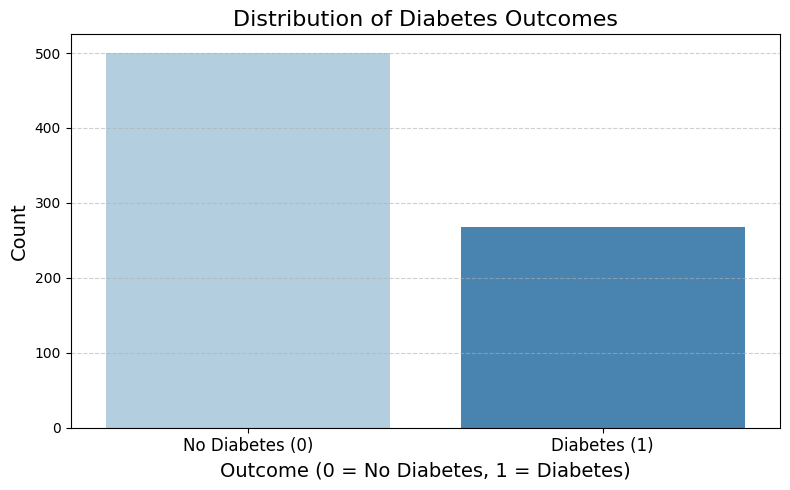

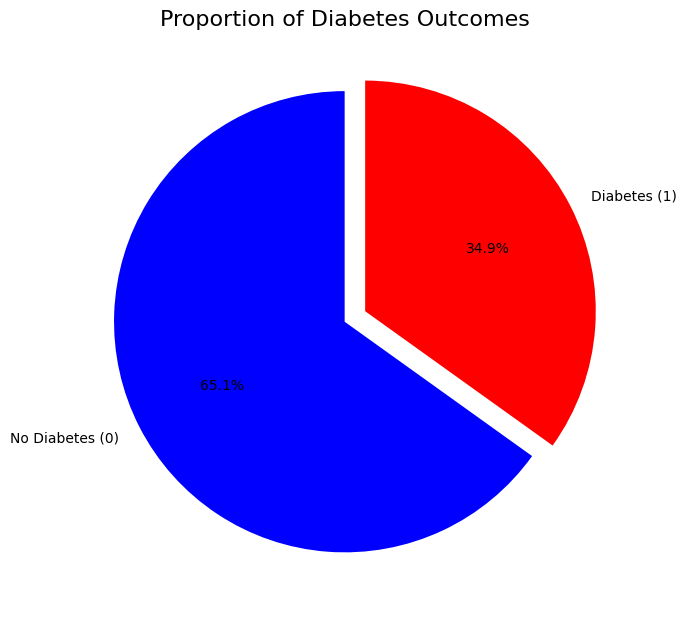

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("diabetes.csv")  # Replace with your dataset file name

# Check target distribution
outcome_counts = data['Outcome'].value_counts()

# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette="Blues", dodge=False)
plt.title("Distribution of Diabetes Outcomes", fontsize=16)
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], labels=["No Diabetes (0)", "Diabetes (1)"], fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(outcome_counts, labels=["No Diabetes (0)", "Diabetes (1)"], autopct='%1.1f%%', startangle=90, colors=["blue", "red"], explode=[0, 0.1])
plt.title("Proportion of Diabetes Outcomes", fontsize=16)
plt.tight_layout()
plt.show()


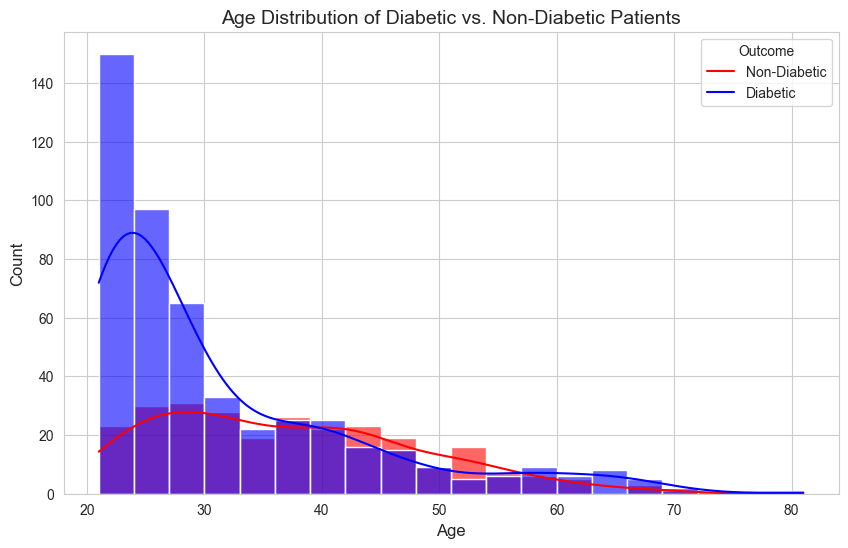

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Pima Indians Diabetes Dataset
df = pd.read_csv("diabetes.csv")  # Update the filename if needed

# Set the plot style
sns.set_style("whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df, x="Age", hue="Outcome", bins=20, kde=True, palette={0: "blue", 1: "red"}, alpha=0.6)

# Customize the plot
plt.title("Age Distribution of Diabetic vs. Non-Diabetic Patients", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Outcome", labels=["Non-Diabetic", "Diabetic"])

# Show the plot
plt.show()


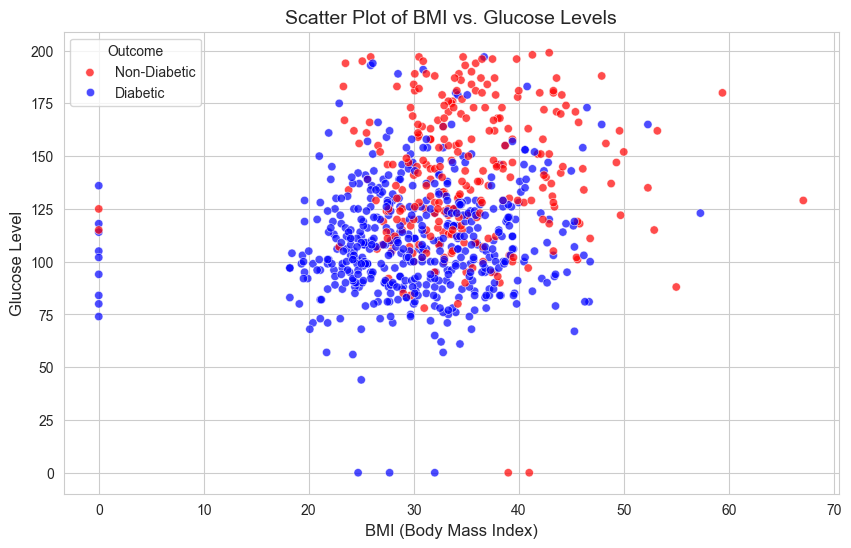

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Pima Indians Diabetes Dataset
df = pd.read_csv("diabetes.csv")  # Update the filename if needed

# Set the plot style
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="BMI", y="Glucose", hue="Outcome", palette={0: "blue", 1: "red"}, alpha=0.7)

# Customize the plot
plt.title("Scatter Plot of BMI vs. Glucose Levels", fontsize=14)
plt.xlabel("BMI (Body Mass Index)", fontsize=12)
plt.ylabel("Glucose Level", fontsize=12)
plt.legend(title="Outcome", labels=["Non-Diabetic", "Diabetic"])

# Show the plot
plt.show()

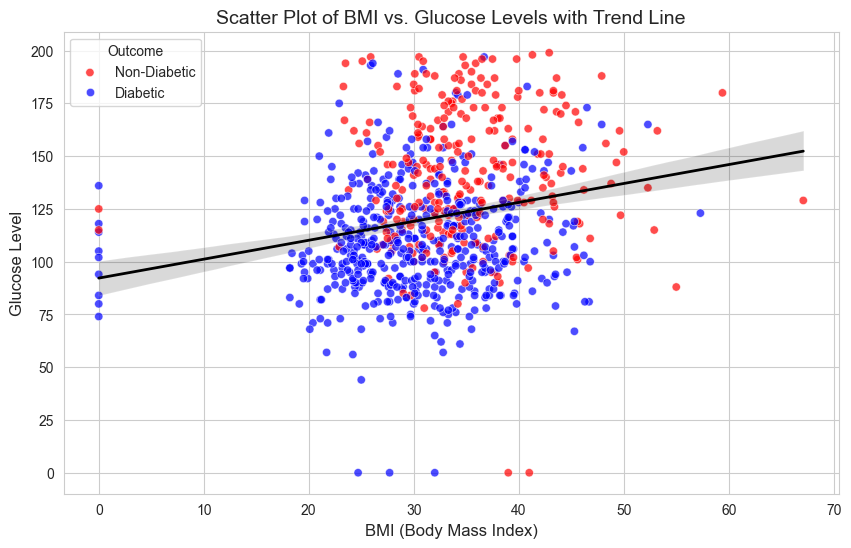

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Pima Indians Diabetes Dataset
df = pd.read_csv("diabetes.csv")  # Update the filename if needed

# Set the plot style
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="BMI", y="Glucose", hue="Outcome", palette={0: "blue", 1: "red"}, alpha=0.7)

# Add a trend line
sns.regplot(data=df, x="BMI", y="Glucose", scatter=False, color='black', line_kws={'linewidth': 2})

# Customize the plot
plt.title("Scatter Plot of BMI vs. Glucose Levels with Trend Line", fontsize=14)
plt.xlabel("BMI (Body Mass Index)", fontsize=12)
plt.ylabel("Glucose Level", fontsize=12)
plt.legend(title="Outcome", labels=["Non-Diabetic", "Diabetic"])

# Show the plot
plt.show()

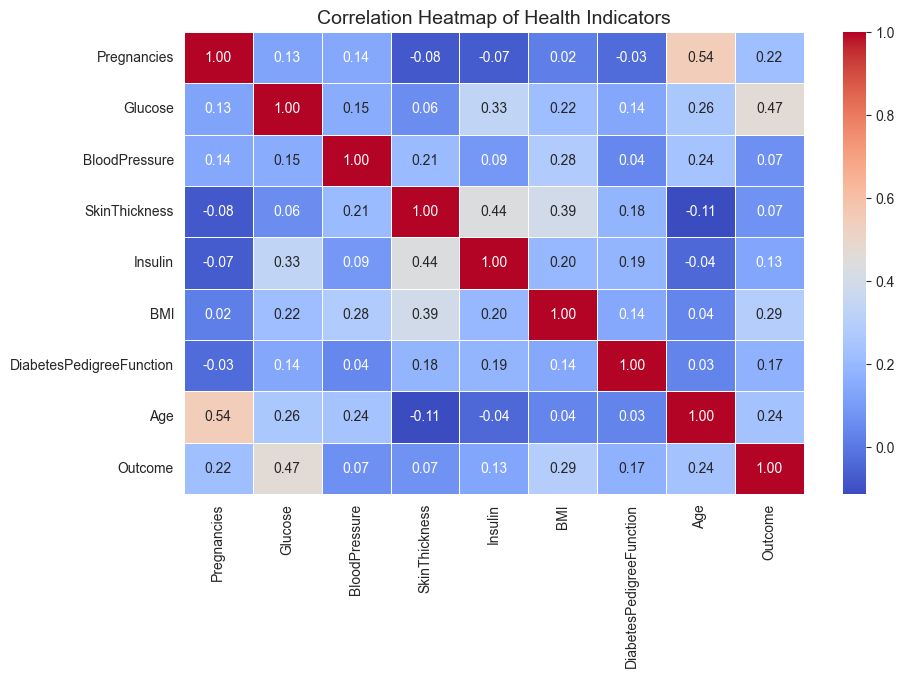

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Pima Indians Diabetes Dataset
df = pd.read_csv("diabetes.csv")  # Update the filename if needed

# Compute the correlation matrix
corr_matrix = df.corr()

# Set the plot style
sns.set_style("whitegrid")

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.4)

# Customize the plot
plt.title("Correlation Heatmap of Health Indicators", fontsize=14)
plt.show()


In [2]:
import matplotlib.pyplot as plt
import networkx as nx

def create_flowchart():
    # Define the flowchart structure
    steps = [
        "Start: Patient Health Data",
        "Data Preprocessing\n(Missing Values, Scaling)",
        "Exploratory Data Analysis (EDA)\n(Visualizations, Correlations)",
        "Feature Selection\n(Selecting Key Health Indicators)",
        "Model Training\n(Logistic Regression, Random Forest, SVM, etc.)",
        "Model Evaluation\n(Accuracy, Precision, Recall, F1-Score)",
        "Prediction & Deployment\n(Interactive Dashboard)"
    ]
    
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add nodes and edges
    for i in range(len(steps) - 1):
        G.add_edge(steps[i], steps[i + 1])
    
    # Draw the flowchart
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=4000, node_color='lightblue', edge_color='black',
            font_size=10, font_weight='bold', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    
    # Show the plot
    plt.title("Diabetes Prediction Model - Methodology Flowchart", fontsize=14)
    plt.show()

# Run the function to display the flowchart
create_flowchart()


ModuleNotFoundError: No module named 'networkx'